In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df.shape

(50000, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [ ]:
# Applying LabelEncoder on target column

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['sentiment'] = encoder.fit_transform(df['sentiment'])
df.sample(5)

,review,sentiment
33960,I am surprised by the relatively low rating th...,1
4452,"The movie ""MacArthur"" begins and ends at Gen. ...",1
5158,Some Plot Spoilers Ahead.<br /><br />The Nashv...,0
32830,Hard to categorize the film - perhaps it's an ...,1
16024,"""Boogie Nights"" is a masterpiece it tells a gr...",1


In [ ]:
df.duplicated().sum()

418

In [ ]:
# Remove duplicates

df = df.drop_duplicates()

In [ ]:
df.shape

(49582, 2)

1    24884
0    24698
Name: sentiment, dtype: int64


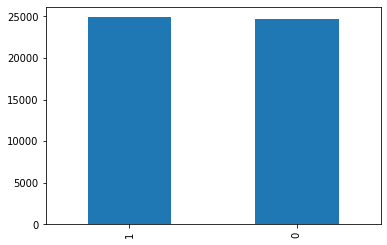

In [ ]:
print(df['sentiment'].value_counts())

df['sentiment'].value_counts().plot(kind = 'bar')
plt.show()


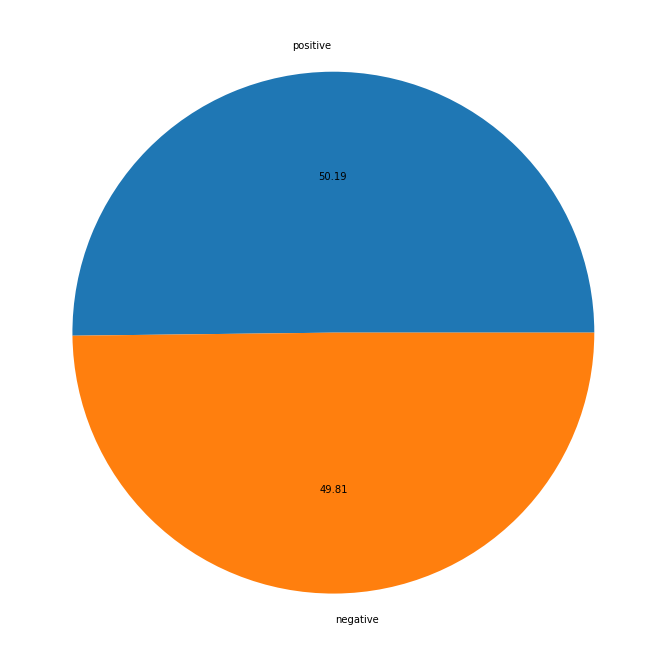

In [ ]:
plt.figure(figsize=(15,12))
plt.pie(df['sentiment'].value_counts(),labels=['positive','negative'],autopct = '%0.2f')
plt.show()

## Creation of Basic Features

In [ ]:
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [ ]:
# Length of message - Number of Characters in message
df['num_characters'] = df['review'].apply(len)
df.head(2)

,review,sentiment,num_characters
0,One of the other reviewers has mentioned that ...,1,1761
1,A wonderful little production. <br /><br />The...,1,998


In [ ]:
! pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['num_words'] = df['review'].apply(lambda x: len(nltk.word_tokenize(x)))
df.head(2)

,review,sentiment,num_characters,num_words
0,One of the other reviewers has mentioned that ...,1,1761,380
1,A wonderful little production. <br /><br />The...,1,998,201


In [ ]:
df['num_sentences'] = df['review'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head(2)

,review,sentiment,num_characters,num_words,num_sentences
0,One of the other reviewers has mentioned that ...,1,1761,380,10
1,A wonderful little production. <br /><br />The...,1,998,201,7


In [ ]:
# Positive messages

df[df['sentiment']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,24884.000000,24884.000000,24884.000000
mean,1326.278532,280.642783,10.424088
std,1032.597204,214.626234,7.557806
min,65.000000,11.000000,1.000000
25%,692.000000,148.000000,6.000000
50%,969.000000,207.000000,9.000000
75%,1615.250000,343.000000,13.000000
max,13704.000000,2911.000000,147.000000


In [ ]:
# Negative messages
df[df['sentiment']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,24698.000000,24698.000000,24698.000000
mean,1294.739615,278.769941,11.003199
std,946.501793,201.448543,7.855898
min,32.000000,8.000000,1.000000
25%,706.000000,153.000000,6.000000
50%,974.000000,211.000000,9.000000
75%,1568.000000,338.000000,13.000000
max,8969.000000,1936.000000,118.000000


<Figure size 1080x720 with 0 Axes>

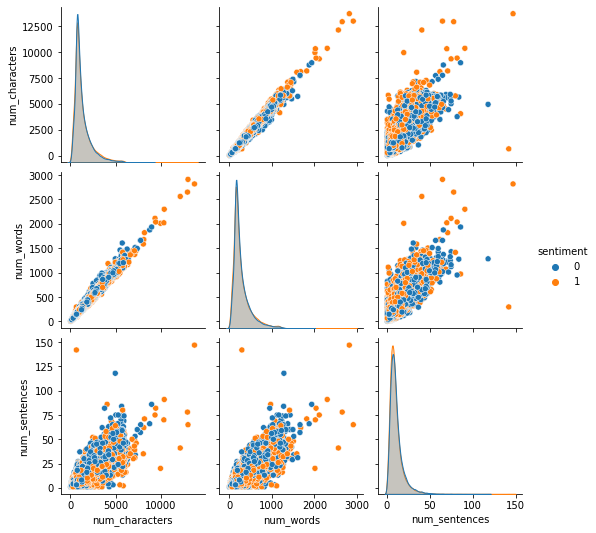

In [ ]:
plt.figure(figsize=(15,10))
sns.pairplot(df,hue='sentiment')
plt.show()

<b> This shows that num_characters, num_words and num_sentences are greater than for positive messages

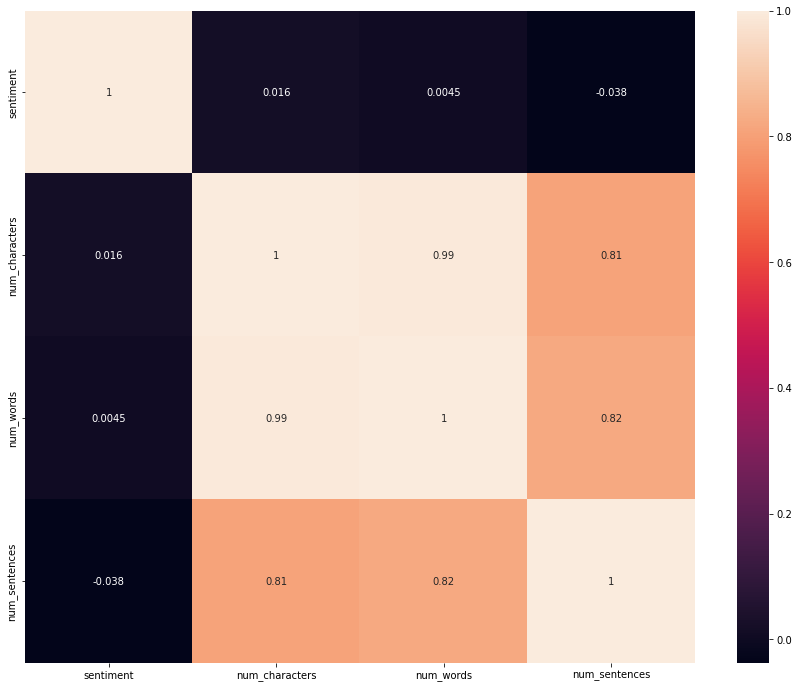

In [ ]:
# To show correlation in data

plt.figure(figsize = (15,12))
sns.heatmap(df.corr(),annot = True)
plt.show()

<b>  It shows input variables(such as num_characters, num_words and num_sentences) have strong correlation with each other so multicollinearity problem exists. We will have to keep one variable (which will be num_characters as it has more correlation with target/sentiment variable than other columns)

## Data Preprocessing

i. Lower case </br>
ii. Tokenization</br>
iii. Removing Special Characters</br>
iv. Removing Stop Words and Punctuation</br>
v. Stemming

In [ ]:
# List of stop words in English

from nltk.corpus import stopwords
nltk.download('stopwords')

stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
# Punctuation marks
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
import re
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()  # lemma = nltk.WordNetLemmatizer() # define lemmatizer

In [ ]:
def transform_text(text):
    text = text.lower() # Lowercasing
    text = nltk.word_tokenize(text) # Tokenization
    text = re.sub("[^a-zA-Z]", " ", str(text)) # Remove non-letters
    text = text.translate(str.maketrans('','',string.punctuation)) # Remove Punctuation
    text = re.sub(' +', ' ',text) # Remove extra spaces
    text = text.strip() # Remove whitespaces
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')]) # Remove stopwords
    text = ' '.join([ps.stem(word) for word in text.split()]) # Stemming  # OR ' '.join([lemma.lemmatize(word) for word in text.split()])
    
    return text

In [ ]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon n want talk stuff anymor tonight k cri enough today'

In [ ]:
df1 = df.sample(5000)

In [ ]:
df1['review'] = df1['review'].apply(transform_text)
df1.head(2)

,review,sentiment,num_characters,num_words,num_sentences
40251,script columbo film seem pull right sappi soap...,0,1147,226,12
13734,dirti harri track rape victim extract reveng s...,1,532,104,5


In [ ]:
# Remove url links

def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'',text)

In [ ]:
df1['review'] = df1['review'].apply(remove_url)

In [ ]:
df1['review'][40251]

'script columbo film seem pull right sappi soap opera deepli charact driven film great charact compel film thing compel desir chang channel villain dialog sound written romanc novelist great lt columbo near famou lovabl self effac crumpl self bride kidnap victim whimper one dimension damsel distress cower fear tini scalpel held flimsili hand abductor come could knock scalpel hand kick know second sens realiti charact would least tri struggl fight back least littl speak realiti stori revolv around kidnap work solv polic polic give break everyon know fbi take everi kidnap case columbo shallow total predict crime drama familiar lt columbo written stretch hour'

In [ ]:
# Forming WordCloud which will highligh important words in both positive and negative messages

from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size =10, background_color = 'white')

In [ ]:
# Positive messages wordcloud

pos_wc = wc.generate(df1[df1['sentiment']==1]['review'].str.cat(sep = " "))

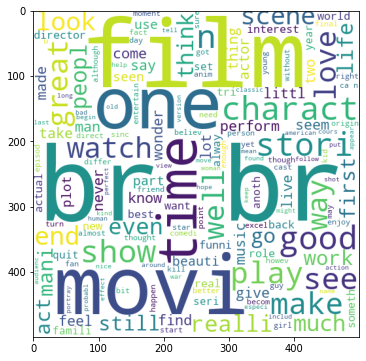

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(pos_wc)

In [ ]:
# Negative messages wordcloud

neg_wc = wc.generate(df1[df1['sentiment']==0]['review'].str.cat(sep = " "))

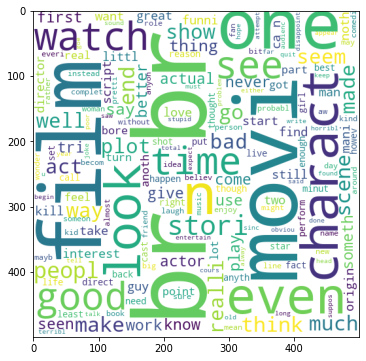

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(neg_wc)

In [ ]:
## Top words in each category
### Positive category

pos_corpus = []
for msg in df1[df1['sentiment']==1]['review'].tolist():
    for word in msg.split():
        pos_corpus.append(word)

In [ ]:
len(pos_corpus)

311020

In [ ]:
from collections import Counter

Counter(pos_corpus) # Dictionary will be craeted showing how many times each word has appeared

Counter({'dirti': 50,
         'harri': 108,
         'track': 69,
         'rape': 56,
         'victim': 50,
         'extract': 6,
         'reveng': 53,
         'shoot': 84,
         'assail': 1,
         'gooli': 1,
         'kill': 292,
         'probabl': 269,
         'apt': 9,
         'punish': 25,
         'would': 1102,
         'let': 230,
         'live': 547,
         'initi': 58,
         'shot': 254,
         'suffer': 82,
         'forev': 48,
         'like': 2081,
         'sister': 129,
         'anyway': 116,
         'action': 398,
         'pack': 34,
         'stori': 1395,
         'set': 411,
         'san': 24,
         'francisco': 5,
         'santa': 13,
         'cruz': 5,
         'chief': 36,
         'rapist': 9,
         'play': 1069,
         'andi': 17,
         'drake': 4,
         'suitabl': 26,
         'vile': 7,
         'get': 1327,
         'end': 956,
         'cours': 252,
         'classic': 274,
         'movi': 4294,
         'better':

In [ ]:
Counter(pos_corpus).most_common(30) # Most common words in positive reviews

[('br', 9683),
 ('film', 5140),
 ('movi', 4294),
 ('one', 2930),
 ('n', 2780),
 ('like', 2081),
 ('time', 1640),
 ('good', 1602),
 ('see', 1500),
 ('charact', 1415),
 ('stori', 1395),
 ('make', 1343),
 ('get', 1327),
 ('well', 1307),
 ('great', 1289),
 ('watch', 1223),
 ('love', 1152),
 ('also', 1133),
 ('show', 1115),
 ('would', 1102),
 ('realli', 1089),
 ('play', 1069),
 ('scene', 1000),
 ('even', 992),
 ('end', 956),
 ('way', 924),
 ('much', 901),
 ('peopl', 877),
 ('think', 872),
 ('first', 870)]

In [ ]:
pd.DataFrame(Counter(pos_corpus).most_common(30))

,0,1
0,br,9683
1,film,5140
2,movi,4294
3,one,2930
4,n,2780
5,like,2081
6,time,1640
7,good,1602
8,see,1500
9,charact,1415


In [ ]:
pd.DataFrame(Counter(pos_corpus).most_common(30))[0]

0          br
1        film
2        movi
3         one
4           n
5        like
6        time
7        good
8         see
9     charact
10      stori
11       make
12        get
13       well
14      great
15      watch
16       love
17       also
18       show
19      would
20     realli
21       play
22      scene
23       even
24        end
25        way
26       much
27      peopl
28      think
29      first
Name: 0, dtype: object

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


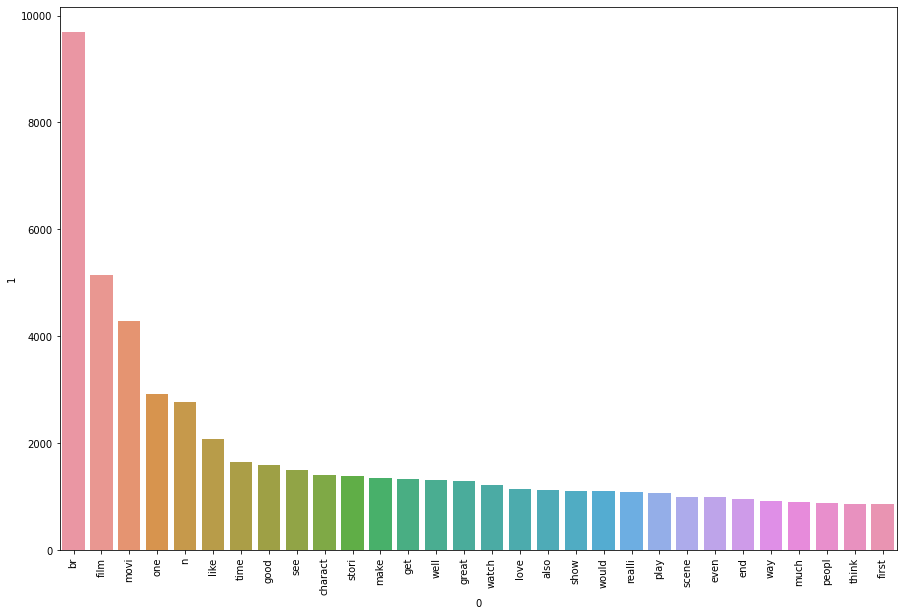

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(pd.DataFrame(Counter(pos_corpus).most_common(30))[0],pd.DataFrame(Counter(pos_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# Negative category

neg_corpus = []
for msg in df1[df1['sentiment']==0]['review'].tolist():
    for word in msg.split():
        neg_corpus.append(word)

In [ ]:
len(neg_corpus)

303142

In [ ]:
Counter(neg_corpus)

Counter({'script': 449,
         'columbo': 16,
         'film': 4526,
         'seem': 782,
         'pull': 81,
         'right': 343,
         'sappi': 12,
         'soap': 43,
         'opera': 33,
         'deepli': 17,
         'charact': 1375,
         'driven': 22,
         'great': 504,
         'compel': 35,
         'thing': 945,
         'desir': 36,
         'chang': 167,
         'channel': 74,
         'villain': 70,
         'dialog': 129,
         'sound': 254,
         'written': 159,
         'romanc': 53,
         'novelist': 1,
         'lt': 7,
         'near': 97,
         'famou': 58,
         'lovabl': 9,
         'self': 100,
         'effac': 1,
         'crumpl': 1,
         'bride': 15,
         'kidnap': 35,
         'victim': 88,
         'whimper': 2,
         'one': 2636,
         'dimension': 44,
         'damsel': 7,
         'distress': 7,
         'cower': 1,
         'fear': 52,
         'tini': 14,
         'scalpel': 3,
         'held': 39,
     

In [ ]:
Counter(neg_corpus).most_common(30)[0]

('br', 10108)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


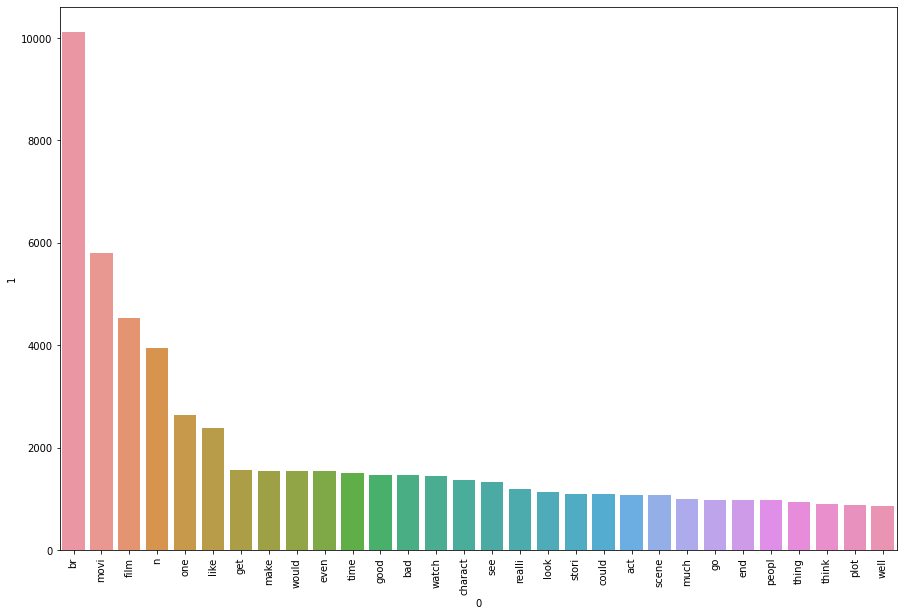

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(pd.DataFrame(Counter(neg_corpus).most_common(30))[0],pd.DataFrame(Counter(neg_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## Model Building

In [ ]:
## Creation of Bag of Words

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(df1['review']).toarray() # Use toarray() to convert sparse array into dense array
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
X.shape # It shows total 5000 sms, and 25819 words

(5000, 25819)

In [ ]:
y = df1['sentiment'].values
y

array([0, 1, 1, ..., 1, 1, 0])

In [ ]:
## Applying train test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state =2)

In [ ]:
X_train.shape

(4000, 25819)

In [ ]:
# On textual based data,naive bayes algorithm performs better.

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print('Accuracy Score: ',accuracy_score(y_test,y_pred1))
print('C.M: ',confusion_matrix(y_test,y_pred1))
print('Precision Score: ',precision_score(y_test,y_pred1))
print('Recall Score: ',recall_score(y_test,y_pred1))
print('F1 Score: ',f1_score(y_test,y_pred1))

Accuracy Score:  0.609
C.M:  [[355 145]
 [246 254]]
Precision Score:  0.6365914786967418
Recall Score:  0.508
F1 Score:  0.5650723025583981


In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print('Accuracy Score: ',accuracy_score(y_test,y_pred2))
print('C.M: ',confusion_matrix(y_test,y_pred2))
print('Precision Score: ',precision_score(y_test,y_pred2))
print('Recall Score: ',recall_score(y_test,y_pred2))
print('F1 Score: ',f1_score(y_test,y_pred2))

Accuracy Score:  0.821
C.M:  [[417  83]
 [ 96 404]]
Precision Score:  0.8295687885010267
Recall Score:  0.808
F1 Score:  0.8186423505572442


In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print('Accuracy Score: ',accuracy_score(y_test,y_pred3))
print('C.M: ',confusion_matrix(y_test,y_pred3))
print('Precision Score: ',precision_score(y_test,y_pred3))
print('Recall Score: ',recall_score(y_test,y_pred3))
print('F1 Score: ',f1_score(y_test,y_pred3))

Accuracy Score:  0.786
C.M:  [[417  83]
 [131 369]]
Precision Score:  0.8163716814159292
Recall Score:  0.738
F1 Score:  0.7752100840336134


In [ ]:
# Creation of Tfidf Vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 3000)

X = tfidf.fit_transform(df1['review']).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Applying MinMaxScaling because standardscaling also gives negative values which naive bayes does not accept

"""

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

"""

<b> MinMaxScaler does not improve results here.

In [ ]:
# Appending the num_character col to X

# X = np.hstack((X,df1['num_characters'].values.reshape(-1,1)))

<b> Also addition of column 'num_characters' does not improve results here

In [ ]:
y = df1['sentiment'].values
y

array([0, 1, 1, ..., 1, 1, 0])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state =2)

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print('Accuracy Score: ',accuracy_score(y_test,y_pred1))
print('C.M: ',confusion_matrix(y_test,y_pred1))
print('Precision Score: ',precision_score(y_test,y_pred1))
print('Recall Score: ',recall_score(y_test,y_pred1))
print('F1 Score: ',f1_score(y_test,y_pred1))

Accuracy Score:  0.726
C.M:  [[358 142]
 [132 368]]
Precision Score:  0.7215686274509804
Recall Score:  0.736
F1 Score:  0.7287128712871288


In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print('Accuracy Score: ',accuracy_score(y_test,y_pred2))
print('C.M: ',confusion_matrix(y_test,y_pred2))
print('Precision Score: ',precision_score(y_test,y_pred2))
print('Recall Score: ',recall_score(y_test,y_pred2))
print('F1 Score: ',f1_score(y_test,y_pred2))

Accuracy Score:  0.832
C.M:  [[413  87]
 [ 81 419]]
Precision Score:  0.8280632411067194
Recall Score:  0.838
F1 Score:  0.8330019880715707


In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print('Accuracy Score: ',accuracy_score(y_test,y_pred3))
print('C.M: ',confusion_matrix(y_test,y_pred3))
print('Precision Score: ',precision_score(y_test,y_pred3))
print('Recall Score: ',recall_score(y_test,y_pred3))
print('F1 Score: ',f1_score(y_test,y_pred3))

Accuracy Score:  0.808
C.M:  [[406  94]
 [ 98 402]]
Precision Score:  0.8104838709677419
Recall Score:  0.804
F1 Score:  0.8072289156626508


In [ ]:
# Comparing results with other algorithms

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1score = f1_score(y_test,y_pred)
    
    return accuracy,precision,recall,f1score

In [ ]:
print('SVC: ',train_classifier(svc,X_train,y_train,X_test,y_test))
print('KNeighborsClassifier: ',train_classifier(knc,X_train,y_train,X_test,y_test))
print('MultinomialNB: ',train_classifier(mnb,X_train,y_train,X_test,y_test))
print('DecisionTreeClassifier: ',train_classifier(dtc,X_train,y_train,X_test,y_test))
print('LogisticRegression: ',train_classifier(lrc,X_train,y_train,X_test,y_test))
print('RandomForestClassifier: ',train_classifier(rfc,X_train,y_train,X_test,y_test))
print('AdaBoostClassifier: ',train_classifier(abc,X_train,y_train,X_test,y_test))
print('BaggingClassifier: ',train_classifier(bc,X_train,y_train,X_test,y_test))
print('ExtraTreesClassifier: ',train_classifier(etc,X_train,y_train,X_test,y_test))
print('GradientBoostingClassifier: ',train_classifier(gbdt,X_train,y_train,X_test,y_test))
print('XGBClassifier: ',train_classifier(xgb,X_train,y_train,X_test,y_test))

SVC:  (0.85, 0.841796875, 0.862, 0.8517786561264822)
KNeighborsClassifier:  (0.681, 0.6889352818371608, 0.66, 0.6741573033707866)
MultinomialNB:  (0.832, 0.8280632411067194, 0.838, 0.8330019880715707)
DecisionTreeClassifier:  (0.677, 0.6220689655172413, 0.902, 0.7363265306122447)
LogisticRegression:  (0.84, 0.8281853281853282, 0.858, 0.8428290766208252)
RandomForestClassifier:  (0.804, 0.8166666666666667, 0.784, 0.7999999999999999)
AdaBoostClassifier:  (0.802, 0.794921875, 0.814, 0.8043478260869565)
BaggingClassifier:  (0.779, 0.7841140529531568, 0.77, 0.7769929364278507)
ExtraTreesClassifier:  (0.812, 0.8291139240506329, 0.786, 0.8069815195071869)
GradientBoostingClassifier:  (0.771, 0.7308347529812607, 0.858, 0.7893284268629255)
XGBClassifier:  (0.766, 0.7246621621621622, 0.858, 0.7857142857142858)


In [ ]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
lgb=LGBMClassifier()
lgb.fit(X_train,y_train)
y_pred = lgb.predict(X_test)
print('Accuracy Score: ',accuracy_score(y_test,y_pred))
print('C.M: ',confusion_matrix(y_test,y_pred))
print('Precision Score: ',precision_score(y_test,y_pred))
print('Recall Score: ',recall_score(y_test,y_pred))
print('F1 Score: ',f1_score(y_test,y_pred))

Accuracy Score:  0.828
C.M:  [[414  86]
 [ 86 414]]
Precision Score:  0.828
Recall Score:  0.828
F1 Score:  0.828


In [ ]:
# Voting Classifier

svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
lgb=LGBMClassifier()

from sklearn.ensemble import VotingClassifier

In [ ]:
voting = VotingClassifier(estimators=[('svc', svc), ('lr', lrc), ('lgb', lgb)],voting='soft')
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svc',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('lr',
                              LogisticRegression(penalty='l1',
                                                 solver='liblinear')),
                             ('lgb', LGBMClassifier())],
                 voting='soft')

In [ ]:
y_pred = voting.predict(X_test)
print("Accuracy ",accuracy_score(y_test,y_pred))
print("Precision ",precision_score(y_test,y_pred))
print("Recall ",recall_score(y_test,y_pred))
print("F1 ",f1_score(y_test,y_pred))

Accuracy  0.854
Precision  0.8484251968503937
Recall  0.862
F1  0.8551587301587302


<b> Voting Calssifier produces little bit better results than SVC

In [ ]:
# Applying stacking

estimators=[('svc', svc), ('lr', lrc), ('lgb', lgb)]
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

In [ ]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=etc)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))
print("Recall ",recall_score(y_test,y_pred))
print("F1 ",f1_score(y_test,y_pred))

Accuracy 0.843
Precision 0.843687374749499
Recall  0.842
F1  0.8428428428428428


<b> Thus SVC algorithm is performing better

In [ ]:
"""
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))
"""